In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import global_params as G
plt.rcParams['figure.figsize'] = G.SMALL_FIG

In [3]:
import numpy as np
from scipy import signal
from scipy.fftpack import fft

np.set_printoptions(precision=4, suppress=True)

In [4]:
from wavegen import cosine_wave, rcosine
from sampling import oversample
from transmitter import pulse_shaped
from receiver import eye_diag
from impairments import add_noise

## Eye Diagrams

In [5]:
N = 1000 # Number of symbols
M = 20 # Oversampling factor

In [6]:
# PAM symbols
symbols = np.random.choice([-1, 1], N)

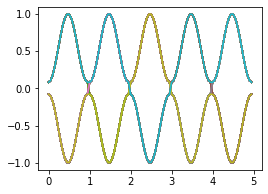

In [7]:
# Eye diagram for hamming pulse
n_eye = 5 # Number of symbols in eye

analog = pulse_shaped(symbols, M)
grouped = eye_diag(analog, n_eye, M)

x_ticks = np.arange(0, n_eye, 1/M)
plt.plot(x_ticks,grouped.T);

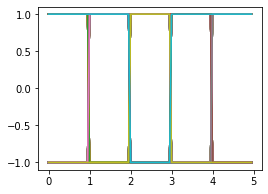

In [8]:
# Eye diagram for Rectangular pulse
def rect_pulse(M):
    return np.ones(M)

analog = pulse_shaped(symbols, M, rect_pulse)
grouped = eye_diag(analog, n_eye, M)

x_ticks = np.arange(0, n_eye, 1/M)
plt.plot(x_ticks,grouped.T);

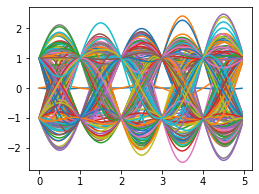

In [9]:
# Eye diagram for a raised cosine
def raised_cosine(M):
    return rcosine(10, M, 0)

analog = pulse_shaped(symbols, M, raised_cosine)
grouped = eye_diag(analog, n_eye, M)

x_ticks = np.arange(0, n_eye, 1/M)
plt.plot(x_ticks,grouped.T);

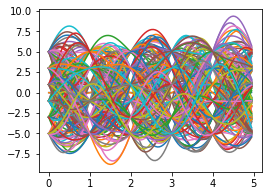

In [10]:
# Ex 11.3
symbols = np.random.choice([-5, -3, -1, 1, 3, 5], N)
analog = pulse_shaped(symbols, M, raised_cosine) # Change pulse shape here
grouped = eye_diag(analog, n_eye, M)

x_ticks = np.arange(0, n_eye, 1/M)
plt.plot(x_ticks,grouped.T);

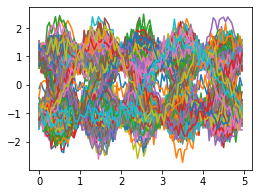

In [11]:
# Ex 11.4
symbols = np.random.choice([-1, 1], N)
analog = add_noise(pulse_shaped(symbols, M, raised_cosine), 0.2) # change pulse shape and noise std
grouped = eye_diag(analog, n_eye, M)

x_ticks = np.arange(0, n_eye, 1/M)
plt.plot(x_ticks,grouped.T);